In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import sklearn
inv = np.linalg.inv
import bio_lda.lda as lda
import bio_lda.util as util

In [2]:
np.random.seed(1)
samples = int(10e3) # Number of samples in dataset
d = 10 # Dimensionality of Data
proportions = [0.5,0.5] # Proportion of samples in classes
X, y, m1, m2, cov = util.generate_dataset(samples, d, proportions, l=1)


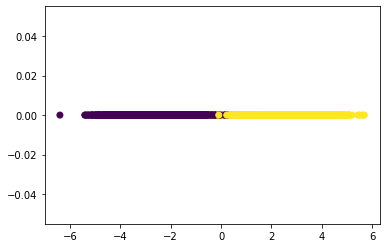

0.9864


In [3]:
y_, true_LDA_score, clf = util.scikit_LDA(X, y)
plt.scatter(y_,np.zeros(y_.shape), c = y)
plt.show()
print(true_LDA_score)


In [4]:
def eta(t):
    return 1e-3

def gamma(t):
    return 1e-3

In [5]:
LDA, err, metric, optimal = util.run_offline(X, y, m1, m2, cov, true_LDA_score, eta, gamma, epochs=20000)

100%|██████████| 20000/20000 [00:11<00:00, 1668.88it/s]


In [6]:
# Offline Accuracy
Y = LDA.w.T.dot(X.T)
max((np.sum(Y[:,y == 1] > 1/2 * LDA.w.T@(m1+m2)) + np.sum(Y[:,y == 0] < 1/2 * LDA.w.T@(m1+m2))), (np.sum(Y[:,y == 0] > 1/2 * LDA.w.T@(m1+m2)) + np.sum(Y[:,y == 1] < 1/2 * LDA.w.T@(m1+m2))) )/X.shape[0]

0.9868

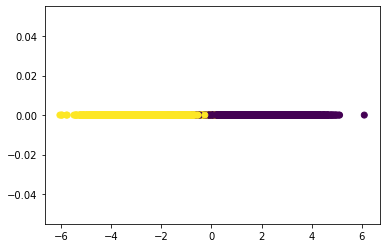

In [7]:
plt.scatter(Y,np.zeros(Y.shape), c = y)
plt.show()

In [8]:
# Optimal Accuracy
optimal_W = np.linalg.inv(cov)@(m1-m2)
Y = optimal_W.T.dot(X.T)
max((np.sum(Y[y == 1] > 1/2 * optimal_W.T@(m1+m2)) + np.sum(Y[y == 0] < 1/2 * optimal_W.T@(m1+m2))), (np.sum(Y[y == 0] > 1/2 * optimal_W.T@(m1+m2)) + np.sum(Y[y == 1] < 1/2 * optimal_W.T@(m1+m2))) )/X.shape[0]

0.9868

In [9]:
optimal[-1]

9.334759951684646e-07

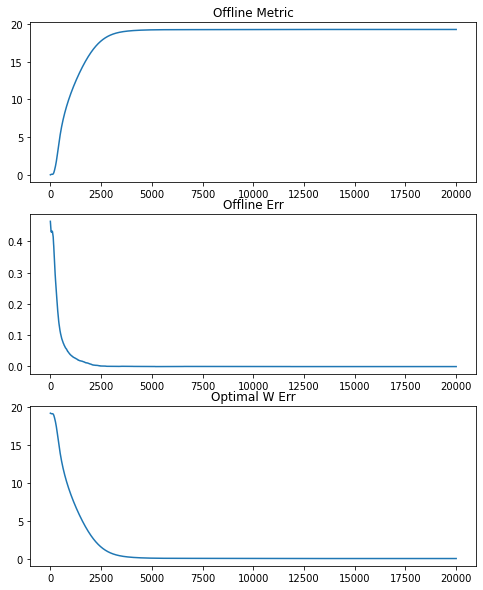

In [10]:
fig, axs = plt.subplots(3,1, figsize=(8,10))

axs[0].plot(metric)
axs[0].set_title("Offline Metric") # Value of W
axs[1].plot(err)
axs[1].set_title("Offline Err") # Accuracy
axs[2].plot(optimal)
axs[2].set_title("Optimal W Err") # Err of W from Optimal W
plt.show()

In [11]:
np.random.seed(0)
LDA, err, metric, optimal, s, mu_d = util.run_online(X, y, m1, m2, cov,  true_LDA_score, epochs=4000)

 27%|██▋       | 1067/4000 [00:40<01:42, 28.53it/s]/Users/aneeshkashalikar/Downloads/bio-lda/bio_lda/util.py:84: RuntimeWarning: invalid value encountered in greater
  err.append(true_lda_score - max((np.sum(Y[y == 1] > 1/2 * LDA.w.T@(m1+m2)) + np.sum(Y[y == 0] < 1/2 * LDA.w.T@(m1+m2))), (np.sum(Y[y == 0] > 1/2 * LDA.w.T@(m1+m2)) + np.sum(Y[y == 1] < 1/2 * LDA.w.T@(m1+m2))) )/X.shape[0])
/Users/aneeshkashalikar/Downloads/bio-lda/bio_lda/util.py:84: RuntimeWarning: invalid value encountered in less
  err.append(true_lda_score - max((np.sum(Y[y == 1] > 1/2 * LDA.w.T@(m1+m2)) + np.sum(Y[y == 0] < 1/2 * LDA.w.T@(m1+m2))), (np.sum(Y[y == 0] > 1/2 * LDA.w.T@(m1+m2)) + np.sum(Y[y == 1] < 1/2 * LDA.w.T@(m1+m2))) )/X.shape[0])
100%|██████████| 4000/4000 [02:35<00:00, 25.80it/s]


In [12]:
s = []
for count, x in enumerate(X):
    if y[count] == 0:
        s.append((x - LDA.mu1).reshape(-1,1)@(x-LDA.mu1).reshape(-1,1).T)

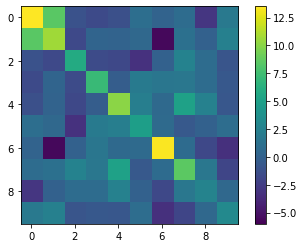

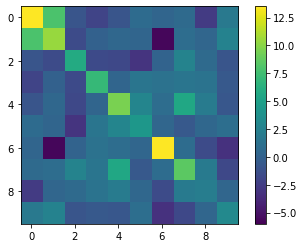

In [13]:
plt.imshow(util.calculate_covariance_matrix(X[:5000]), clim= [-6,13.5])
plt.colorbar()
plt.show()
plt.imshow(np.sum(s, axis=0)/5000, clim= [-6,13.5])
plt.colorbar()
plt.show()

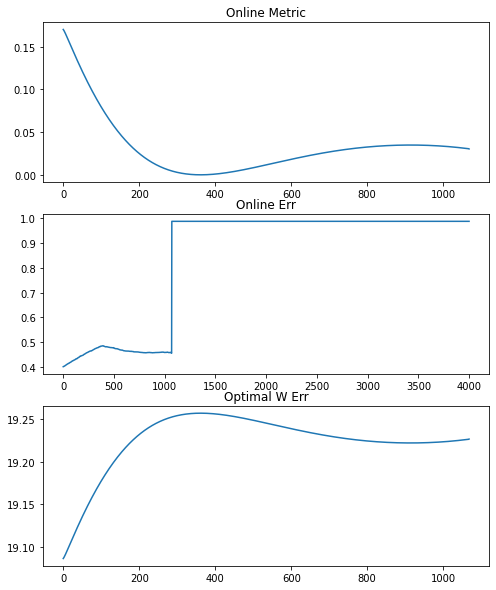

In [14]:
fig, axs = plt.subplots(3,1, figsize=(8,10))

axs[0].plot(metric)
axs[0].set_title("Online Metric") # Value of W
axs[1].plot(err)
axs[1].set_title("Online Err") # Accuracy
axs[2].plot(optimal)
axs[2].set_title("Optimal W Err") # Err of W from Optimal W
plt.show()

In [15]:
optimal[-1], err[-1]

(nan, 0.9864)

In [16]:
# Online Accuracy
Y = LDA.w.T.dot(X.T)
max((np.sum(Y[y == 1] > 1/2 * LDA.w.T@(m1+m2)) + np.sum(Y[y == 0] < 1/2 * LDA.w.T@(m1+m2))), (np.sum(Y[y == 0] > 1/2 * LDA.w.T@(m1+m2)) + np.sum(Y[y == 1] < 1/2 * LDA.w.T@(m1+m2))) )/X.shape[0]

/Users/aneeshkashalikar/.pyenv/versions/3.7.0/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in greater
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/aneeshkashalikar/.pyenv/versions/3.7.0/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in less
  This is separate from the ipykernel package so we can avoid doing imports until


0.0

/Users/aneeshkashalikar/.pyenv/versions/3.7.0/lib/python3.7/site-packages/matplotlib/colors.py:1012: UserWarning: Warning: converting a masked element to nan.
  dtype = np.min_scalar_type(value)
/Users/aneeshkashalikar/.pyenv/versions/3.7.0/lib/python3.7/site-packages/numpy/core/numeric.py:538: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


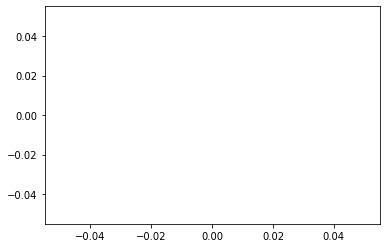

In [17]:
plt.scatter(Y,np.zeros(Y.shape), c = y)
plt.show()